In [1]:
import os
import numpy as np
import scipy.spatial.distance as sd
import matplotlib.pyplot as plt
from tesser import util
import pandas as pd
from tesser import sr
from tesser import tasks
from tesser import util
from tesser import rsa
import importlib
from scipy.spatial import distance
from scipy import stats
#work desktop:
data_dir = '/Users/athula/Dropbox/Experiments/tesser_successor/Data/'
#laptop:
#data_dir = '/Users/athulapudhiyidath/Dropbox/Experiments/tesser_successor/Data'
roi_dir = os.path.join(data_dir, 'item_betas', 'roi')

In [2]:
#read in individual induct fits, which match alpha + gamma + tau values of structure learning SR 
#based on participants' performance in the inductive inference task

induct_fits = pd.read_csv('individual_induct_fits.csv')
induct_fits

,gamma,alpha,tau,subject,log_like
0,1.000000,0.868520,0.406615,100,-28.982943
1,0.992111,0.712560,2.711327,101,-25.406295
2,0.776361,0.022944,0.725353,102,-20.825487
3,0.925354,0.685406,1.307407,103,-25.866600
4,1.000000,0.956121,0.941730,104,-28.361274
5,1.000000,0.129351,2.040554,105,-22.919007
6,0.703446,0.103798,0.894549,106,-24.974311
7,0.992474,0.937901,1.465202,107,-27.662623
8,0.997764,0.600534,0.656197,108,-28.698749
9,0.683364,0.000381,0.467239,109,-19.505478


In [3]:
#b_hip_tail r-values
roi_list = ['b_hip_ant', 'b_hip_tail']
n_state = 21
M = np.zeros((n_state, n_state))

all_corr_data = pd.DataFrame(columns=roi_list)
for r in range(0, len(roi_list)):
    roi = roi_list[r]
    corr_vals = []
    for s in range(0, len(induct_fits)):
        subject = induct_fits.subject[s]
        gamma_val = induct_fits.gamma[s]
        alpha_val = induct_fits.alpha[s]
        struct_all = util.load_struct_subject(data_dir, subject)
        envstep = struct_all.objnum.values - 1
               
        sr_reps = sr.neural_sr(envstep, gamma_val, alpha_val, M, n_state)
        sr_reps_part2 = sr_reps[struct_all['part'] == 2]
        sr_rdm = distance.squareform(distance.pdist(sr_reps_part2, 'correlation'))
        sr_rdm_sym = rsa.make_sym_matrix(sr_rdm)
               
        patterns = rsa.load_betas(data_dir, subject, roi)          
        neural_rdm = distance.squareform(distance.pdist(patterns, 'correlation'))
        neural_rdm_sym = rsa.make_sym_matrix(neural_rdm)

        r_val, p_val = stats.spearmanr(distance.squareform(sr_rdm_sym), distance.squareform(neural_rdm_sym))
        corr_vals.append(r_val)
    
    all_corr_data[roi] = corr_vals

In [4]:
all_corr_data

,b_hip_ant,b_hip_tail
0,-0.002361,-0.002304
1,-0.006059,-0.002594
2,-0.006418,-0.002915
3,-0.005532,-0.005233
4,-0.003211,-0.001039
5,-0.002876,-0.003943
6,-0.004561,-0.002600
7,-0.001926,-0.001927
8,-0.002084,-0.001588
9,-0.002396,-0.002202


In [5]:
np.mean(all_corr_data.b_hip_ant)

-0.0037093927938645303

In [6]:
np.mean(all_corr_data.b_hip_tail)

-0.0028807305571146398

In [7]:
subject = 101
roi = 'b_hip_ant'
struct_all = util.load_struct_subject(data_dir, subject)
struct_pt1 = struct_all[struct_all.part==1]
struct_pt2 = struct_all[struct_all.part==2]

In [8]:
util.object_count_run(struct_pt1)

[65,
 76,
 70,
 41,
 46,
 52,
 55,
 44,
 40,
 62,
 112,
 107,
 119,
 113,
 113,
 104,
 90,
 65,
 70,
 72,
 59]

In [9]:
util.object_count_run(struct_pt2)

[36,
 30,
 38,
 42,
 55,
 39,
 44,
 54,
 47,
 54,
 45,
 36,
 41,
 41,
 36,
 44,
 40,
 40,
 38,
 41,
 41]

(2457, 21)

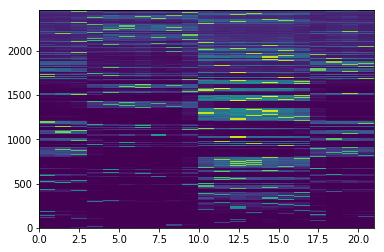

In [10]:
#use all of structure learning, both Part 1 and Part 2 to model SR
envstep = struct_all.objnum.values - 1
n_state = 21
M = np.zeros((n_state, n_state))
sr_reps = sr.neural_sr(envstep, .9, .1, M, n_state)
plt.pcolor(sr_reps)
sr_reps.shape

(1575, 21)

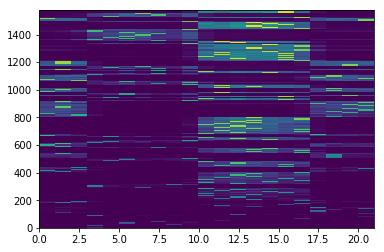

In [17]:
#now only extrat Part 1
sr_reps_part1 = sr_reps[struct_all['part'] == 1]
plt.pcolor(sr_reps_part1)
sr_reps_part1.shape

(882, 21)

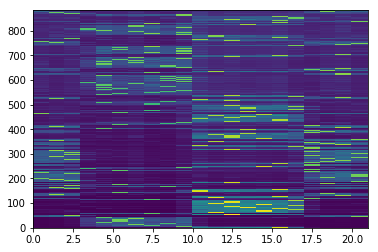

In [11]:
#now only extrat Part 2
sr_reps_part2 = sr_reps[struct_all['part'] == 2]
plt.pcolor(sr_reps_part2)
sr_reps_part2.shape

(882, 859)

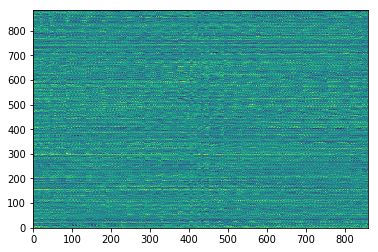

In [12]:
#import the neural data
patterns = rsa.load_betas(data_dir, subject, roi)
plt.pcolor(patterns)
patterns.shape

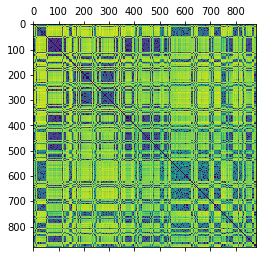

In [13]:
sr_rdm = distance.squareform(distance.pdist(sr_reps_part2, 'correlation'))
#make SR matrix symmetric:
sr_rdm_sym = rsa.make_sym_matrix(sr_rdm)
plt.matshow(sr_rdm)

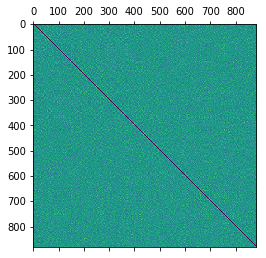

In [14]:
neural_rdm = distance.squareform(distance.pdist(patterns, 'correlation'))
#make neural matrix symmetric:
neural_rdm_sym = rsa.make_sym_matrix(neural_rdm)
plt.matshow(neural_rdm_sym)

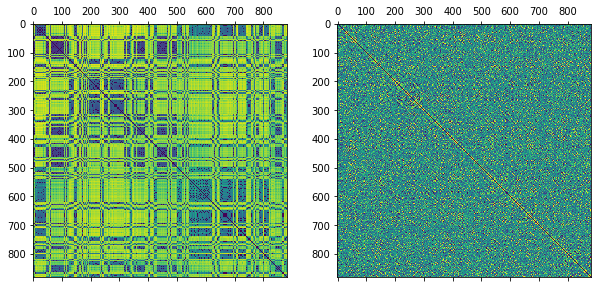

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].matshow(sr_rdm_sym)
vmin, vmax = np.percentile(distance.squareform(neural_rdm_sym), [1, 99])
ax[1].matshow(neural_rdm_sym, vmin=vmin, vmax=vmax)

In [16]:
stats.spearmanr(distance.squareform(sr_rdm_sym), 
                distance.squareform(neural_rdm_sym))


SpearmanrResult(correlation=-0.005104124566991057, pvalue=0.0014652186876972114)